# Credits

Most of the content of this notebook was taken from the Numpy's quickstart tutorial from the official documentation at
https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html ([Numpy License](http://www.numpy.org/license.html)), and adapted for a 2 hours workshop. 

# Introduction to Numpy: Part 2

In this second part, we will explain how Numpy deals with operations between arrays that do not have exactly the same shape. We will also apply what we learned so far to analyze the evolution of the mean surface temperature over the last 50 years using the [NCEP/NCAR Reanalysis 1 Surface Temperature](https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html). 
The NCEP/NCAR Reanalysis 1 project is using a state-of-the-art analysis/forecast system to perform data assimilation using past data from 1948 to the present.

Finally, we will also learn how to present this information in nice looking plots that are able to convince climate-change skeptics.

## Table Of Contents

1. [Numpy review](#Review)
1. [Broadcasting rules](#Broadcasting)
1. [Hands-on](#Hands-on)
1. [Exercises](#Exercises)
1. [License and Credits](#License)

<a id='Review'></a>
# Numpy review

## The Basics

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy, dimensions are called axes.

The more important attributes of an ndarray object (named my_array) are:

* __my_array.ndim__ : the number of axes (dimensions) of the array.
* __my_array.shape__ : the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.
* __my_array.size__ : : the total number of elements of the array. This is equal to the product of the elements of shape.
* __my_array.dtype__ : an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

## Array operations

**The operations are element-wise!**

| Operator     | Name           | Description                                            |
|--------------|----------------|--------------------------------------------------------|
| ``a + b``    | Addition       | Sum of ``a`` and ``b``                                 |
| ``a - b``    | Subtraction    | Difference of ``a`` and ``b``                          |
| ``a * b``    | Multiplication | Product of ``a`` and ``b``                             |
| ``a / b``    | True division  | Quotient of ``a`` and ``b``                            |
| ``a // b``   | Floor division | Quotient of ``a`` and ``b``, removing fractional parts |
| ``a % b``    | Modulus        | Integer remainder after division of ``a`` by ``b``     |
| ``a ** b``   | Exponentiation | ``a`` raised to the power of ``b``                     |

## Aggregations: min, max, sum, prod, mean, std, var, any, all

We commonly need to compute statistics on a large amount of data. NumPy has fast built-in aggregation functions to compute the following statistics:

* **min** : Return the minimum along a given axis
* **argmin** : Returns the indices of the minimum values along an axis
* **max** : Return the maximum along a given axis
* **argmax** : Returns the indices of the maximum values along an axis
* **sum** : Return the sum of the array elements over the given axis.
* **cumsum** : Return the cumulative sum of the array elements over the given axis.
* **prod** : Return the product of the array elements over the given axis.
* **mean** : Returns the average of the array elements along given axis.
* **std** : Returns the standard deviation of the array elements along given axis.
* **var** : Returns the variance deviation of the array elements along given axis.
* **any** : Test whether any array element along a given axis evaluates to True.
* **all** : Test whether all array elements along a given axis evaluate to True.
    

<a id='Broadcasting'></a>
# Arrays Broadcasting

When we perform operations on arrays of the same shape, binary operations are performed on an element-by-element basis.

In [1]:
import numpy as np
a=[1,2,3,4]
b=[10,20,30,40]
a+b

[1, 2, 3, 4, 10, 20, 30, 40]

Broadcasting allows the operations between arrays to deal in a meaningful way with inputs that do not have exactly the same shape. NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [2]:
a=np.asarray([0,1,2]) # shape (3,)  
a + 5 # 5 is an scalar, can be seen as an array of shape (1,)

array([5, 6, 7])

We can think of **the scalar is being stretched** during the arithmetic operation **into an array with the same shape as "a"**. The new elements in this new array are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies, so that broadcasting operations are as memory and computationally efficient as possible.
<img src="fig/broadcasting_1.png">

## Rules

When operating on two arrays, NumPy compares their shapes element-wise. Broadcasting in NumPy follows follows two rules.

* __Rule 1__: If **the input arrays do not have the same number of dimensions**: a "1" will be repeatedly prepended (added to the left) to the shapes of the smaller arrays until all the arrays have the same number of dimensions.
* __Rule 2__. If **the number of dimensions are equal**: the arrays arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. 

If **the first two rules can not be applied**, then a ValueError exception is raised.

Lets see how these rules work using simple examples.

### Arrays with the same number of dimensions

Lets consider first arrays with the same number of dimensions (axes).

In [3]:
a=np.ones((3,3))              # shape (3,3) ,  2 dimensions 

b=np.arange(3).reshape(3,1)   # shape (3,1) ,  2 dimensions 
# Notice that b was reshaped to have the same number of dimensions as a

print("a.shape =",a.shape)
print("b.shape =",b.shape)

a.shape = (3, 3)
b.shape = (3, 1)


In [4]:
a + b # shape (3,3) + shape (3,1)

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

Lets recall the second rule: 
* If **the number of dimensions are equal**: the arrays arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. 

*Array plotting convention ( rows, columns )*
<img src="fig/broadcasting_2.png?">

Here is another example:

In [5]:
a=np.arange(3).reshape(3,1)   # shape (3,1) ,  2 dimensions 

b=np.arange(3).reshape(1,3)   # shape (1,3) ,  2 dimensions 
# Notice that b was reshaped to have the same number of dimensions as a

print("a.shape =",a.shape)
print("b.shape =",b.shape)

a.shape = (3, 1)
b.shape = (1, 3)


*Array plotting convention ( rows, columns )*
<img src="fig/broadcasting_4.png?">

**The broadcasting steps:**

1. Extend __a__ along the second dimension to match **b** (Rule 2)
   ``a.shape: (3,1) -> (3,3)``

1. Extend __b__ along the first dimension to match **a** (Rule 2)
``b.shape: (1,3) -> (3,3)``

1. Perform the operation if the shapes are the same.

### Arrays with the different number of dimensions

Now lets see what happens with arrays with different number of dimensions (axes).

* If **the input arrays do not have the same number of dimensions**: a "1" will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.

In [6]:
a=np.ones((3,3))   # shape (3,3) ,  2 dimensions 

b=np.arange(3)     # shape (3,) ,  1 dimensions 

print("a.shape =",a.shape)
print("b.shape =",b.shape)

a.shape = (3, 3)
b.shape = (3,)


In [7]:
a+b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [8]:
(a+b).shape

(3, 3)

**The broadcasting steps:**

1. Add one dimension to **b** towards the left. (Rule 1)
   ``b.shape: (3,) -> (1,3)``
   
1. Extend __a__ along the second dimension to match **b** (Rule 2)
   ``a.shape: (3,1) -> (3,3)``

1. Extend __b__ along the first dimension to match **a** (Rule 2)
``b.shape: (1,3) -> (3,3)``

1. Perform the operation if the shapes are the same.

### Incompatible arrays

Now lets show a few examples of incompatible arrays.

In [9]:
a=np.arange(9).reshape((3,3)) # shape (3,3)
b=np.arange(3*4).reshape((3,4)) # shape (3,4)
a + b

ValueError: operands could not be broadcast together with shapes (3,3) (3,4) 

#### Why??
The second rule of broadcasting only stretches dimensions with **size 1**. 

In [10]:
a=np.ones((5,3))   # shape (5,3) ,  2 dimensions 

b=np.arange(5)     # shape (5,) ,  1 dimensions 

print("a.shape =",a.shape)
print("b.shape =",b.shape)

a + b

a.shape = (5, 3)
b.shape = (5,)


ValueError: operands could not be broadcast together with shapes (5,3) (5,) 

**The broadcasting steps:**

1. The dimensions do not match. Fix them.

1. Add one dimension to **b** towards the left. (Rule 1)
   ``b.shape: (5,) -> (1,5)``
   
1. Extend __b__ along the second dimension to match **b** (Rule 2)
   ``b.shape: (1,5) -> (5,5)``

1. We can't perform the operation since the final shapes are not the same.
   ``a.shape: (5,3)``
   ``b.shape: (5,5)``
   
### How do we add a and b? 

The 1st broadcasting rule only adds new dimensions to left part of the array.
To make **a** and __b__ compatible, an extra dimension should be added 
to <b>b</b> on the right side.

This can be done in two ways:

* Adding the dimension of size 1 to the right using the reshape function
* By making use of the newaxis keyword in the slice operation.

In [11]:
a=np.ones((5,3))   # shape (5,3) ,  2 dimensions 

b=np.arange(5)     # shape (5,) ,  1 dimensions 

fixed_b=b.reshape(5,1) # Add a dimension of size 1 to the right

print("a.shape =",a.shape)
print("fixed_b.shape =",fixed_b.shape)

a + fixed_b

a.shape = (5, 3)
fixed_b.shape = (5, 1)


array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.]])

In [12]:
fixed_b=b[:,np.newaxis] # Use of the newaxis keyword

print("a.shape =",a.shape)
print("fixed_b.shape =",b.shape)

a + fixed_b

a.shape = (5, 3)
fixed_b.shape = (5,)


array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.]])

<a id='Hands-on'></a>
# Hands-on! 

# Analyze the evolution of the surface temperature over the last 50 years

To apply what we learned so far, we will analyze the evolution of the mean surface temperature over the last 50 years using the [NCEP/NCAR Reanalysis 1 Surface Temperature](https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html). The NCEP/NCAR Reanalysis 1 project is using a state-of-the-art analysis/forecast system to perform data assimilation using past data from 1948 to the present.


We will use the long term monthly means, derived from data for years 1981-2010. Download the file from here (25.7 MB) and store it in the same folder where you have this notebook: 

ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc

The file is in [netCDF format](https://www.unidata.ucar.edu/software/netcdf/). To read this format we will use the [netCDF4-python](http://unidata.github.io/netcdf4-python/) library.

If you don't have it installed you can installed via **conda** (recommended) or via **pip**.

### Conda install

Use the Terminal or an Anaconda Prompt (windows) for the following steps.
```
conda install --name my_environment_name netCDF4
```
where *my_environment_name* is the name of your anaconda environment (if you have created one).
If you are working with the anaconda base environment, then do:
```
conda install netCDF4
```

This will install the netCDF4-python package along with all its dependencies.

### Pip install

To install the package using [pip](https://pip.pypa.io/en/stable/) you can execute:
```
pip install netCDF4
```

In [13]:
# To install netCDF4-python using pip uncomment the following line and execute the cell.

# !pip install netCDF4

#### So, we have the netcd library install and ready to use, lets explore the downloaded file first.

In [14]:
# Load the library
import netCDF4

# Let's load the file by instanciating a Dataset class.
# A netCDF Dataset is a collection of dimensions, groups, variables and attributes.
# Together they describe the meaning of data and relations among data fields stored in a netCDF file

my_dataset = netCDF4.Dataset('air.mon.mean.nc', 'r')

# Dataset(file_name, access_mode) 
#     filename: Name of netCDF file to hold dataset. 
#     access_mode: 'r' means read-only
    


In [15]:
# Lets check which NETCDF format the file is.
my_dataset.file_format

'NETCDF4_CLASSIC'

The "NETCDF4_CLASSIC" data model is made up of variables, the dimensions (of the variables) and attributes.

#### Lets see the dimensions of the variables in this file

In [16]:
# Lets see the dimensions of the variables in this file
# Each dimension is stored in the `dimensions` attribute, which is a dictionary.
# Remember, a dictionary is a collection of key, value pairs. In this case, dimension_name, dimension_object pairs.

# So, lets print the dictionary keys:
my_dataset.dimensions.keys()

odict_keys(['lat', 'lon', 'time'])

In [17]:
my_dataset.dimensions['lon']
# We see that the dimension is an object that contains two attributes. The name and the size of that dimension.

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144

In [18]:
my_dataset.dimensions['lat']

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73

In [19]:
my_dataset.dimensions['time']

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 853

#### Now lets see the available variables in the file.

In [20]:
my_dataset.variables.keys()

odict_keys(['lat', 'lon', 'time', 'air'])

In [21]:
my_dataset.variables['lat']

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
    actual_range: [ 90. -90.]
    long_name: Latitude
    standard_name: latitude
    axis: Y
unlimited dimensions: 
current shape = (73,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [22]:
my_dataset.variables['lon']

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [  0.  357.5]
    standard_name: longitude
    axis: X
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [23]:
my_dataset.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    delta_t: 0000-01-00 00:00:00
    avg_period: 0000-01-00 00:00:00
    prev_avg_period: 0000-00-01 00:00:00
    standard_name: time
    axis: T
    units: hours since 1800-01-01 00:00:0.0
    actual_range: [1297320. 1919712.]
unlimited dimensions: time
current shape = (853,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [24]:
my_dataset.variables['air']

<class 'netCDF4._netCDF4.Variable'>
float32 air(time, lat, lon)
    long_name: Monthly Mean Air Temperature at sigma level 0.995
    valid_range: [-2000.  2000.]
    units: degC
    add_offset: 0.0
    scale_factor: 1.0
    missing_value: -9.96921e+36
    precision: 1
    least_significant_digit: 0
    var_desc: Air Temperature
    level_desc: Surface
    statistic: Mean
    parent_stat: Individual Obs
    dataset: NCEP Reanalysis Derived Products
    actual_range: [-73.78001  42.14595]
unlimited dimensions: time
current shape = (853, 73, 144)
filling on, default _FillValue of 9.969209968386869e+36 used

### What we know about the file

* Contain four variables: latitude (*lat*), longitude (*lon*), time (*time*), and surface temperature (*air*, monthly mean)
* The dimensions of each variables are:
    * lat(lat)
    * lon(lon)
    * time(time)
    * air(time , lat , lon)    

### Read time variable
First, lets convert the time variable from hours since 1800-01-01 00:00:0.0 to a [datetime object](https://docs.python.org/3/library/datetime.html?highlight=datetime%20datetime#datetime.datetime).
A python date time object contains the information of the date and the time. Its attributes are: year, month, day, hour, minute, second, microsecond, and tzinfo.

In [25]:
# Lets read the times
times_in_hours = my_dataset.variables['time'][:]
# the last [:] is to return the actual data expressed as a numpy array instead of the more
# general netcdf variable instance.

print("times_in_hours.shape:",times_in_hours.shape)
print("times_in_hours[0]:",times_in_hours[0])
print("type(times_in_hours)",type(times_in_hours))

times_in_hours.shape: (853,)
times_in_hours[0]: 1297320.0
type(times_in_hours) <class 'numpy.ma.core.MaskedArray'>


Wait, **numpy.ma.core.MaskedArray**... What is that? Where is my numpy array?

Masked arrays are arrays that **may** have missing or invalid entries. In many circumstances, datasets can be incomplete or tainted by the presence of invalid data. For example, a sensor may have failed to record a data, or recorded an invalid value. The numpy.ma module provides a convenient way to address this issue, by introducing masked arrays.

A masked array is the combination of a standard numpy.ndarray (stored in the data attribute) and a mask (stored in the mask attribute). A mask is either nomask, indicating that no value of the associated array is invalid, or an array of booleans that determines for each element of the associated array whether the value is valid or not. When an element of the mask is False, the corresponding element of the associated array is valid and is said to be unmasked. When an element of the mask is True, the corresponding element of the associated array is said to be masked (invalid).

Lets see if is any masked time.

In [26]:
# Lets see the first 10 to have an idea how a mask looks like
times_in_hours.mask[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [27]:
# Now lets see if there is any True value.
times_in_hours.mask.all()  # The all method test whether any array element along a given axis evaluates to True.

False

Nice! We don't have any invalid time. Lets work with the numpy array part only and move on with our time conversion.

In [28]:
times_in_hours = my_dataset.variables['time'][:].data

# The times are expressed in hours since 1800-01-01 00:00:00

# Numpy has a special data type to deal with date/times and date/time intervals.
# Lets see how we can convert the times in hours to actual date/times.
times_in_hours = np.array(times_in_hours, dtype='timedelta64[h]')
# timedelta64 is the actual time interval data type, the [h] denotes that the interval is expressed in hours.
print(times_in_hours[0])

1297320 hours


In [29]:
# So, we have the times expressed in numpy timedelta intevals. 
# But we want the actual date/times.

# When we work with the numpy date data-types, this becomes a simple addition.

reference_date = np.array('1800-01-01T00', dtype='datetime64')
print("reference date: ",reference_date)

times = times_in_hours + reference_date
# times_in_hours : a timedelta64 object
# reference_date : a datetime64 object
print("Oldest date:",times.min())
print("Newest date:",times.max())


reference date:  1800-01-01T00
Oldest date: 1948-01-01T00
Newest date: 2019-01-01T00


### Read temperature data

In [30]:
temperature = my_dataset.variables['air'][:]
# Now lets see if there is any True value.
print("Masked values?: ",temperature.mask.all() )
temperature = temperature.data # Keep the ndarray part

Masked values?:  False


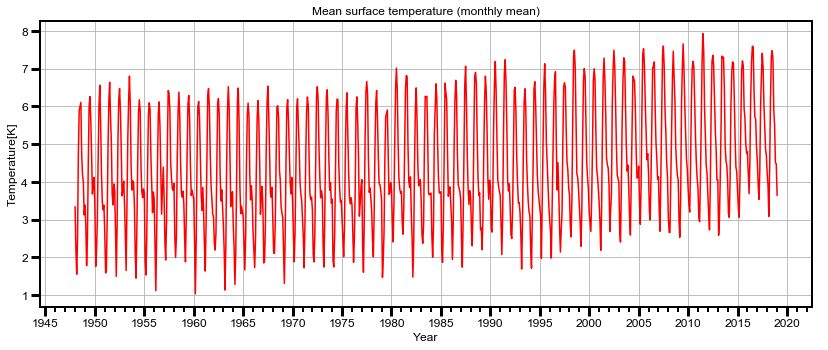

In [31]:
# recall the temperature dimensions 
# temperature(time , lat , lon) 

# Lets compute the global mean temperature over time.
global_mean = temperature.mean(axis=(1,2))

# Lets plot the result. 
import matplotlib.pyplot as plt # Pyplot provides an interface simular to matlab
import matplotlib.dates as mdates # For date formatting functions

%matplotlib inline 
# %matplotlib inline this is needed in jupyter notebooks to display the plot here.

fig = plt.figure(figsize=(13,5))

ax = plt.gca() # Get current axis
plt.plot(times, global_mean, color='r') # Do a line plot , color: 'r'=red

# If you want to add a second line with a different color:
# plt.plot(times, other_temperature, color='b') # , color: 'b'=blue

# Set some plots parameters
ax.set(xlabel='Year', 
       ylabel='Temperature[K]',
       title='Mean surface temperature (monthly mean)')

# lets set the x-tick labels
years = np.array(times,dtype='datetime64[Y]')

# Lets make the x majort ticks spacing every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5)) # every 5-years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Date formatter. Only show the year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid() # Draw a grid in the plot

# fig.savefig("test.png") In case that you want to save the figure
plt.show()

<a id='Exercises'></a>
# Exercises


# Exercise 1: 
Plot the evolution of the temperature averaged over the following latitude ranges:
* [-30,30] degrees
* [30,60] degrees
* [-60,30] degrees

Hints:
* You should first get a mask with the indexes where the latitudes values are in the desired range.
* You can use that to select the indexes along the latitude dimension


In [32]:
# HINT:
# temperature(time , lat , lon) 

# Lets read the latitude
latitude = my_dataset.variables['lat'][:].data

# Remember that boolean arrays can be used to select elements from an array
selection = (latitude>50) & (latitude<60) 
print("latitude.shape=\n",latitude.shape)
print("selection.shape=\n",selection.shape)
print("selection=\n",selection)

# Show a latitude range
print("selected_latitudes:\n",latitude[ (latitude>50) & (latitude<60) ])

print("temperature[:,selection,:].shape: ", temperature[:,selection,:].shape)

latitude.shape=
 (73,)
selection.shape=
 (73,)
selection=
 [False False False False False False False False False False False False
 False  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
selected_latitudes:
 [57.5 55.  52.5]
temperature[:,selection,:].shape:  (853, 3, 144)


In [33]:
# Solve the exercise here ;)


# Exercise 2: 

Plot the yearly-mean (running window) temperature. Plot it on top of the montly-mean temperature values.

Hint:
* You can do the running mean using the scipy uniform_filter function.

result = ndimage.uniform_filter(ascent, size=20)
To compute the mean over 12 months you can do the trick using reshape and taking the average over 

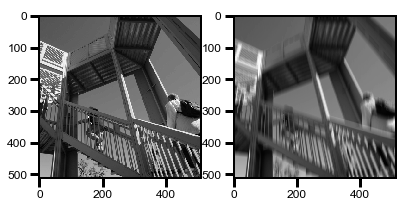

In [34]:
# Taken from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.uniform_filter.html
from scipy import ndimage, misc # Import scipy modules

import matplotlib.pyplot as plt

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ascent = misc.ascent() # nice image (512x512)

window_average = (20 , 20 ) # how many grid points in each direction to average

# Do the window averaging , a window=0 mean no average.
result = ndimage.uniform_filter(ascent, size=(20,0))


ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

In [35]:
# Now, use the uniform filter to compute the yearly average
# temperature(time , lat , lon) 


<a id='License'></a>

# Credits

Most of the content of this notebook was taken from the Numpy's quickstart tutorial from the official documentation.
https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html and released under the same license.

No copyright is claimed to the modifications made to the Numpy's quickstart tutorial over which this notebook bas based.


# License

### Numpy's License

Copyright © 2005-2018, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

    Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
    Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
    Neither the name of the NumPy Developers nor the names of any contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS “AS IS” AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.